In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Importing the photo
# Step 1: Load the image and convert it to a numpy array
image_path = "profile1.png"  # Replace with your image path
img = Image.open(image_path)
img_arr= np.array(img)


print("DataType: ",img_arr.dtype)
print("Dimensions: ", img_arr.ndim)
print("Shape: ", img_arr.shape)
print("Resolution: ", img_arr.shape[0], "x", img_arr.shape[1])

DataType:  uint8
Dimensions:  3
Shape:  (1600, 1200, 3)
Resolution:  1600 x 1200


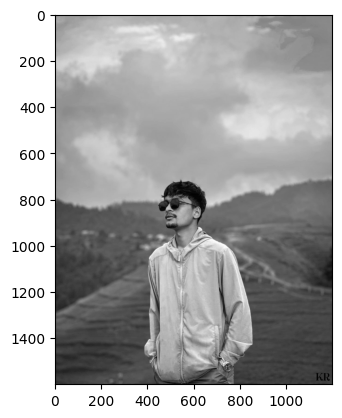

In [6]:
# Step 2: Convert to grayscale
gray_image = np.mean(img_arr, axis=2)

# dispaying the greyscale imgae
plt.imshow(gray_image, cmap= "grey")



In [20]:
# Step 3: Add padding to the image
padded_image = np.pad(gray_image, pad_width=1, mode='constant', constant_values=0)

# Sobel Filter Kernels
Kx = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])
Ky = np.array([[-1,  0,  1],
               [-2,  0,  2],
               [-1,  0,  1]])


array([0., 0., 0.])

In [21]:
# Step 4: Apply edge detection
edge_detected_image = np.zeros_like(gray_image)

for i in range(1, padded_image.shape[0] - 1):
    for j in range(1, padded_image.shape[1] - 1):
        # Extract the 3x3 neighbourhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]
        # Calculate Gradx and Grady
        Gradx = np.sum(neighborhood * Kx)
        Grady = np.sum(neighborhood * Ky)
        # Calculate the edge value
        edge_detected_image[i-1, j-1] = abs(Gradx) + abs(Grady)


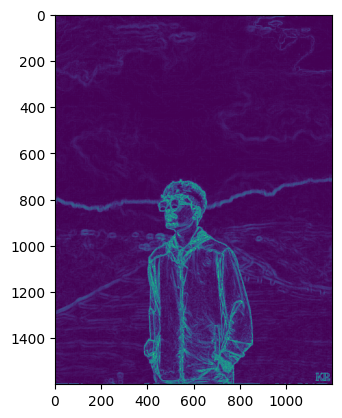

In [24]:
# Step 5: Convert the numpy array to a PIL image
edge_image = Image.fromarray(edge_detected_image.astype(np.uint8))

# Step 6: Show/save the image
edge_image.save("edge_detected_image.jpg")

plt.imshow(edge_image)


2. <h1>
Pandas assignment: </h1>
On the attached salaries dataset, perform following:
<ul>
<li> What is the job title and base pay of “David Shinn”
<li> What is the average base pay
<li> Fill the missing numeric value in each column using the column's average
<li> Select and display rows where the JobTitle is "CAPTAIN III (POLICE
DEPARTMENT)". 
<li> Find employees whose BasePay is greater than $200,000.  Identify the employees who received the lowest Benefits.
<li> Find the top 5 employees based on their TotalPay, and display their
EmployeeName, JobTitle, and TotalPay.
<li> Calculate the average BasePay for each unique JobTitle.
<li>Find the job title with the highest average BasePay.
</ul>

In [ ]:
df = pd.read_csv("Salaries.csv")

# Preliminary data exploration

df.head()

# printing the no columns in database
df.columns


# checking for NaN values
df.isna().values.sum()


df.Benefits.isna().values.sum()

df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
# Job title and base pay for David Shinn
df.head()

david_df = df.loc[df['EmployeeName'] == 'David Shinn'].reset_index()

# displaying the job title
print(f"Job title of David Shinn {david_df.loc[0]['JobTitle']}")

# Base pay
print(f"Base pay: {david_df.BasePay.mean()}")




Job title of David Shinn Deputy Chief 3
Base pay: 196288.255


In [ ]:
# average base pay of employee
print(f"Average Base Pay of Employye: { df.BasePay.mean()}")

Average Base Pay of Employye: 66325.4488404877


In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
# checking for NaN values in BasePay Columns
print(df.BasePay.isna().values.sum())

# filling the NaN values with the average BasePay
df.BasePay.fillna(df.BasePay.mean(), inplace= True)

# checking for NaN values in BasePay Columns
print(df.BasePay.isna().values.sum())

0
0


<ipython-input-49-8cd08cddfe45>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BasePay.fillna(df.BasePay.mean(), inplace= True)


In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
# overtime columns
df.OvertimePay.fillna(df.OvertimePay.mean(), inplace = True)

# Benefits Column
df.Benefits.fillna(df.Benefits.mean(), inplace= True)

# TotalPay Column
df.TotalPay.fillna(df.TotalPay.mean(), inplace= True)

#TotalPayBenefits Column
df.TotalPayBenefits.fillna(df.TotalPayBenefits.mean(), inplace=True)


<ipython-input-52-2d5bdcf465d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.OvertimePay.fillna(df.OvertimePay.mean(), inplace = True)
<ipython-input-52-2d5bdcf465d4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# displaying the rows where jobtitle is CAPTAIN III (POLICE DEPARTMENT)


sample_df = df.loc[df['JobTitle']== 'CAPTAIN III (POLICE DEPARTMENT)']

sample_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,NaN,San Francisco,NaN
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,25007.893151,297608.92,297608.92,2011,NaN,San Francisco,NaN
61,62,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT),102571.24,7437.00,128543.64,25007.893151,238551.88,238551.88,2011,NaN,San Francisco,NaN
65,66,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT),185369.69,37873.61,14465.53,25007.893151,237708.83,237708.83,2011,NaN,San Francisco,NaN
91,92,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT),102722.40,7437.00,118456.21,25007.893151,228615.61,228615.61,2011,NaN,San Francisco,NaN
93,94,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT),215914.03,0.00,12293.83,25007.893151,228207.86,228207.86,2011,NaN,San Francisco,NaN
125,126,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT),185369.68,27321.83,4651.44,25007.893151,217342.95,217342.95,2011,NaN,San Francisco,NaN
211,212,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT),188341.62,0.00,16206.24,25007.893151,204547.86,204547.86,2011,NaN,San Francisco,NaN
214,215,JOHN FEENEY,CAPTAIN III (POLICE DEPARTMENT),188348.55,5720.22,10173.43,25007.893151,204242.20,204242.20,2011,NaN,San Francisco,NaN


In [ ]:
# Finding the employees whose base pay is greater than 200000

basepay_df = df.loc[df['BasePay']> 200000]
basepay_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25007.893151,307899.46,307899.46,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25007.893151,302377.73,302377.73,2011,NaN,San Francisco,NaN
12,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0.00,0.00,25007.893151,294580.02,294580.02,2011,NaN,San Francisco,NaN
13,14,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0.00,21342.59,25007.893151,292671.62,292671.62,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110953,110954,Ronald P Flynn,Assistant Chief Attorney 1,201296.01,0.00,1250.00,57125.630000,202546.01,259671.64,2014,NaN,San Francisco,NaN
110954,110955,Sheryl L Bregman,Assistant Chief Attorney 1,201296.00,0.00,1250.00,57125.620000,202546.00,259671.62,2014,NaN,San Francisco,NaN
110976,110977,Susan T Obata,Supervising Physician Spec,202445.22,0.00,0.00,55649.140000,202445.22,258094.36,2014,NaN,San Francisco,NaN
110977,110978,John O Funghi,Engineer/Architect Principal,201181.01,0.00,0.00,56841.850000,201181.01,258022.86,2014,NaN,San Francisco,NaN


In [ ]:
# Identifying the Top 10 employees with lowest benefits
lowest_benefits_df = df.sort_values('Benefits', ascending=True)[:10]
lowest_benefits_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110530,110531,David P Kucia,Police Officer 3,66325.44884,0.00,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
144099,144100,Leticia Villacampa,Secretary 2,0.00000,0.00,9991.77,-13.80,9991.77,9977.97,2014,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,66325.44884,0.00,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,66325.44884,0.00,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
90855,90856,Geraldine P Hernandez,Special Nurse,81549.59000,9796.90,13595.81,0.00,104942.30,104942.30,2013,NaN,San Francisco,NaN
146673,146674,Ryan M Bernard,Benefits Technician,0.00000,0.00,3007.68,0.00,3007.68,3007.68,2014,NaN,San Francisco,NaN
109515,109516,Sio Mei Chu,School Crossing Guard,438.90000,0.00,1110.49,0.00,1549.39,1549.39,2013,NaN,San Francisco,NaN
90811,90812,Edward M Harrington,Executive Contract Employee,66325.44884,0.00,105105.00,0.00,105105.00,105105.00,2013,NaN,San Francisco,NaN
90525,90526,Thomas Tang,Police Officer 3,66325.44884,0.00,106079.31,0.00,106079.31,106079.31,2013,NaN,San Francisco,NaN
90478,90479,Julia Dyett,Special Nurse,101451.76000,1442.67,3350.16,0.00,106244.59,106244.59,2013,NaN,San Francisco,NaN


In [ ]:
# Find the top 5 employees based on their TotalPay, and display their EmployeeName, JobTitle, and TotalPay.

top_5 = df.sort_values('TotalPay', ascending=False)[:5]
top_5[['EmployeeName', 'JobTitle', 'TotalPay']]

,EmployeeName,JobTitle,TotalPay
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),538909.28
110531,David Shinn,Deputy Chief 3,471952.64
110532,Amy P Hart,Asst Med Examiner,390111.98
36159,Gary Altenberg,"Lieutenant, Fire Suppression",362844.66


In [ ]:
#Calculate the average BasePay for each unique JobTitle.
# Find the job title with the highest average BasePay.

grouped_df = df.groupby('JobTitle', as_index= False).agg({'BasePay': 'mean'})

72925

In [ ]:
# Calulating JobTitle With highest pay
print(f"Job Title with Highest Pay: {grouped_df[grouped_df['BasePay'] == grouped_df.BasePay.max()]['JobTitle']}")
print(f"BasePay for Highest Pay: {grouped_df[grouped_df['BasePay'] == grouped_df.BasePay.max()]['BasePay']}")


Job Title with Highest Pay: 474    Chief of Police
Name: JobTitle, dtype: object
BasePay for Highest Pay: 474    309767.683333
Name: BasePay, dtype: float64
